<a href="https://colab.research.google.com/github/Panko44/SysthmataLhpshsApofasewn/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_%CE%A3%CF%85%CF%83%CF%84%CE%AE%CE%BC%CE%B1%CF%84%CE%B1_%CE%9B%CE%AE%CF%88%CE%B7%CF%82_%CE%91%CF%80%CE%BF%CF%86%CE%AC%CF%83%CE%B5%CF%89%CE%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive


In [ ]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/heart_2020_cleaned.csv"
Health_data = pd.read_csv(path)

In [ ]:
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
Health_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


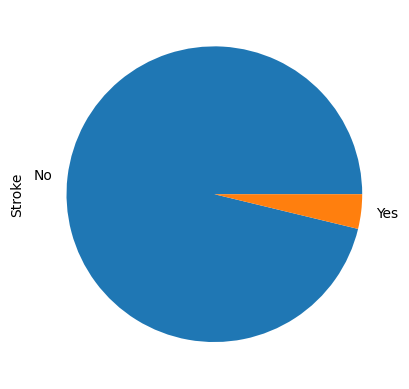

In [ ]:
Health_data.Stroke.value_counts(normalize=True)

#plot the pie chart of education categories
Health_data.Stroke.value_counts(normalize=True).plot.pie()
plt.show()


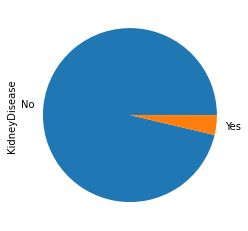

In [ ]:
Health_data.KidneyDisease.value_counts(normalize=True)

#plot the pie chart of education categories
Health_data.KidneyDisease.value_counts(normalize=True).plot.pie()
plt.show()

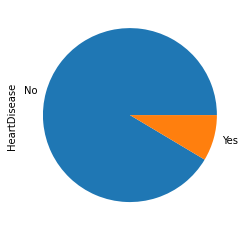

In [ ]:
Health_data.HeartDisease.value_counts(normalize=True)

#plot the pie chart of education categories
Health_data.HeartDisease.value_counts(normalize=True).plot.pie()
plt.show()

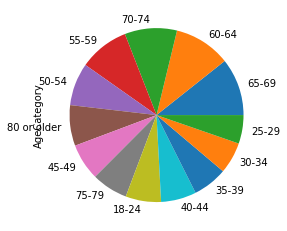

In [ ]:
Health_data.AgeCategory.value_counts(normalize=True)

#plot the pie chart of education categories
Health_data.AgeCategory.value_counts(normalize=True).plot.pie()
plt.show()

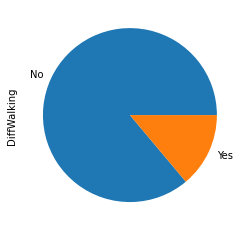

In [ ]:
Health_data.DiffWalking.value_counts(normalize=True)

#plot the pie chart of education categories
Health_data.DiffWalking.value_counts(normalize=True).plot.pie()
plt.show()

Text(0.5, 1.0, 'Plot the DiffWalking of all people')

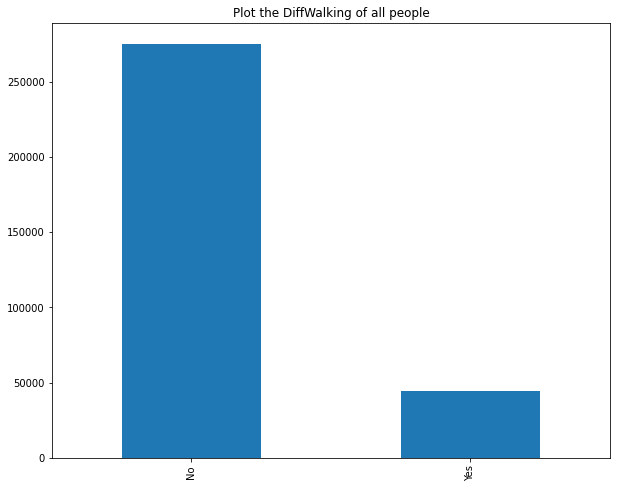

In [ ]:
df = pd.DataFrame(Health_data)
top_10 = df['DiffWalking'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot the DiffWalking of all people')

Text(0.5, 1.0, 'Plot people who have heart disease')

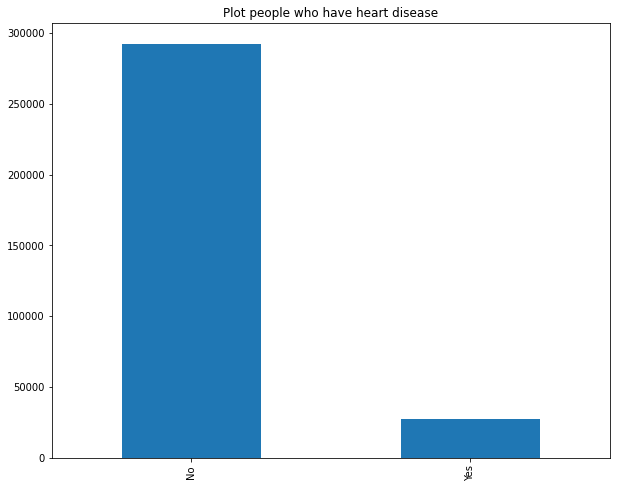

In [ ]:
df = pd.DataFrame(Health_data)
top_10 = df['HeartDisease'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot people who have heart disease')

Text(0.5, 1.0, 'Plot AgeCategory')

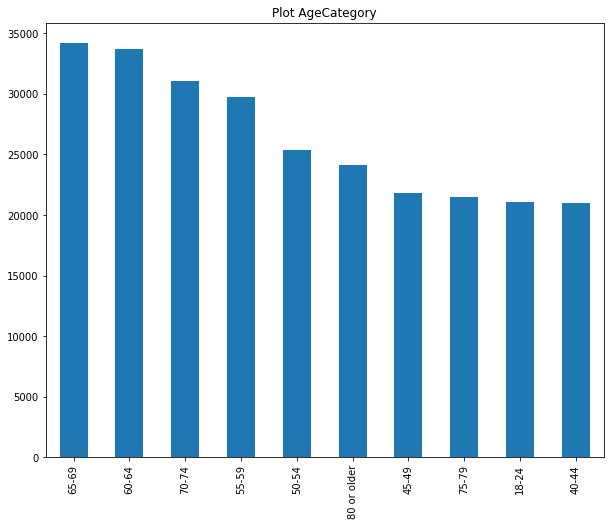

In [ ]:
df = pd.DataFrame(Health_data)
top_10 = df['AgeCategory'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot AgeCategory')

Text(0.5, 1.0, 'Plot KidneyDisease')

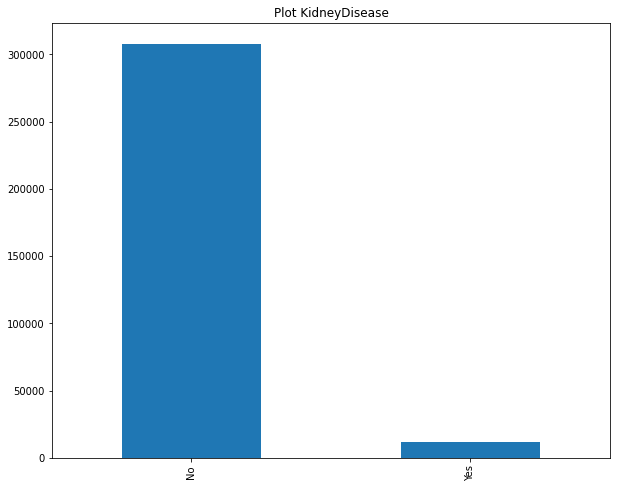

In [ ]:
df = pd.DataFrame(Health_data)
top_10 = df['KidneyDisease'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot KidneyDisease')

Text(0.5, 1.0, 'Plot Stroke')

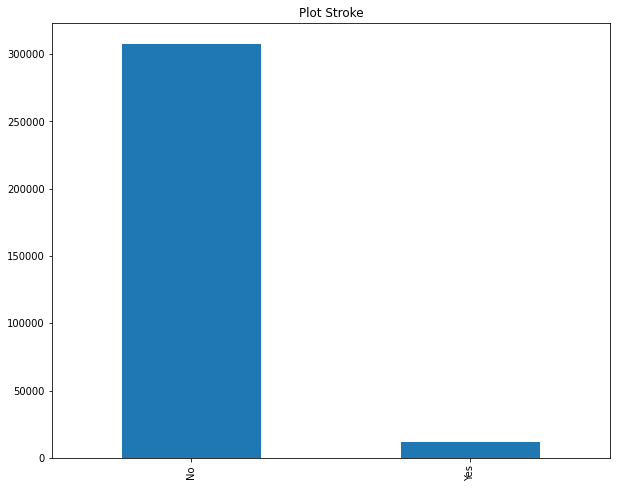

In [ ]:
df = pd.DataFrame(Health_data)
top_10 = df['Stroke'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Plot Stroke')

In [ ]:
#categorial
le = LabelEncoder()
col = Health_data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
  Health_data[i] = le.fit_transform(Health_data[i])
Health_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [ ]:
#numeric
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime'  ]
Scaler = StandardScaler()
Health_data[num_cols] = Scaler.fit_transform(Health_data[num_cols])

In [ ]:
fig = px.imshow(Health_data.corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

# If the value is 1, it is said to be a positive correlation between two variables. This means that when one variable increases, the other variable also increases.
# If the value is -1, it is said to be a negative correlation between the two variables. This means that when one variable increases, the other variable decreases.
# If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.

In [ ]:
# iloc[] function is used to select values from the dataset
# independent variables

Health_data.drop("Sex",axis=1, inplace=True)
Health_data.drop("Race",axis=1, inplace=True)
Health_data.drop("PhysicalHealth",axis=1, inplace=True)
Health_data.drop("MentalHealth",axis=1, inplace=True)
Health_data.drop("BMI",axis=1, inplace=True)
Health_data.drop("SkinCancer",axis=1, inplace=True)
Health_data.drop("Smoking",axis=1, inplace=True)
Health_data.drop("PhysicalActivity",axis=1, inplace=True)
Health_data.drop("SleepTime",axis=1, inplace=True)
Health_data.drop("GenHealth",axis=1, inplace=True)
Health_data.drop("Asthma",axis=1, inplace=True)
Health_data.drop("Diabetic",axis=1, inplace=True)
Health_data.drop("AlcoholDrinking",axis=1, inplace=True)


X = Health_data.iloc[:,1:].values
# dependent variable
y = Health_data.iloc[:,0].values

In [ ]:
# train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# declaring an object of standardscaler class
sc = StandardScaler()
# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)
# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

In [ ]:
# declaring a object of GaussianNB class
clf_Gaussian = GaussianNB()
clf_Gaussian.fit(X_train, y_train)
y_pred = clf_Gaussian.predict(X_test)
print("Accuracy:",clf_Gaussian.score(X_test, y_test))
print('Precision: %s' % precision_score(y_test, y_pred))
print('F1 score: %s' % f1_score(y_test, y_pred))

Accuracy: 0.8885536046529808
Precision: 0.3193013882669055
F1 score: 0.28577154308617236


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58445
           1       0.32      0.26      0.29      5514

    accuracy                           0.89     63959
   macro avg       0.63      0.60      0.61     63959
weighted avg       0.88      0.89      0.88     63959



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[55405  3040]
 [ 4088  1426]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision: %s' % precision_score(y_test, y_pred))
print('F1 score: %s' % f1_score(y_test, y_pred))

Accuracy: 0.9015150330680592
Precision: 0.31459612659423714
F1 score: 0.17455117284759533


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58445
           1       0.31      0.12      0.17      5514

    accuracy                           0.90     63959
   macro avg       0.62      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[56994  1451]
 [ 4848   666]]


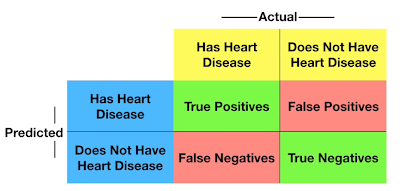   



*   True positives (TP): the cases for which the classifier predicted ‘heart disease’ and the people had actually heart disease.
*   True negatives (TN): the cases for which the classifier predicted ‘no heart disease’ and the people had not heart disease.
*   False positives (FP): the cases for which the classifier predicted ‘no heart disease’ but the people had actually heart disease.
*   False negatives (FN): the cases for which the classifier predicted 'heart disease’ but the the people had not heart disease.